In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/questions.csv',error_bad_lines=False, engine="python")

<ipython-input-3-f5b03f6697f7>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/questions.csv',error_bad_lines=False, engine="python")
Skipping line 133839: unexpected end of data


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [ ]:
df.shape

(133837, 6)

In [ ]:
df.dropna(axis = 0, inplace =True)

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df.shape

(133836, 6)

In [ ]:
df =pd.DataFrame(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133836 entries, 0 to 133836
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            133836 non-null  int64 
 1   qid1          133836 non-null  int64 
 2   qid2          133836 non-null  int64 
 3   question1     133836 non-null  object
 4   question2     133836 non-null  object
 5   is_duplicate  133836 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 7.1+ MB


In [ ]:
df.drop('id',axis = 1, inplace =True)

In [ ]:
df['qid2'] = df['qid2'].astype(int)
df['is_duplicate'] = df['is_duplicate'].astype(int)
df.tail(5)


,qid1,qid2,question1,question2,is_duplicate
133832,265031,265032,"How good is the MSc Innovation, Entrepreneursh...",What does Jake Williams think about the Blacks...,0
133833,265033,265034,How can I be a better person and improve my qu...,I cannot improve my questions on Quora. This i...,1
133834,265035,265036,Why does it hurt to love someone?,Why does love hurt so good?,1
133835,265037,265038,Does time exist?,"Broadly, does time exist, and if so, in what r...",0
133836,265039,265040,Are you personally attracted to people with th...,Which is the correct opt. She did not pass the...,0


In [ ]:
df.sample(10)

,qid1,qid2,question1,question2,is_duplicate
106570,211366,211367,What is important in life?,What is important in human life?,1
5391,10775,10776,How can you determine tartaric acid titration?,Will BYJU's learning app is good enough to hel...,0
7828,15636,15637,What is the best technique for SEO?,What are the top techniques for SEO?,1
10097,20162,20163,Where can I buy a fake iPhone 6s?,Where can I buy a fake iPhone?,0
73845,146742,146743,What's the chance of a US victory on Russian s...,What's the chance of a US victory on Russian s...,1
57397,114195,114196,How do I live without love?,Can we live without love?,1
20511,40922,40923,Autism: Will my 5-year-old non-verbal autistic...,"How do you potty train a 4 year old, nonverbal...",0
96353,191260,191261,What are some good mystery TV shows?,What are the best mystery TV series?,1
92295,183244,183245,What evidence has been made public proving the...,What did the Russians actually hack regarding ...,0
66879,132969,132970,What is mechanism?,What is mechanize?,0


In [ ]:
df['is_duplicate'].value_counts()

0    83999
1    49837
Name: is_duplicate, dtype: int64

In [ ]:
df.duplicated().sum() # to check weather some row is completely duplicate or not 

0

In [ ]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100) # calculating percentage

0    62.762635
1    37.237365
Name: is_duplicate, dtype: float64


In [ ]:
# 62% values are not duplicate, 38 are duplicate

In [ ]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_ques = np.unique(qid)
unique_ques_number = unique_ques.shape
print(unique_ques_number)
print(len(qid))

(265038,)
267672


In [ ]:
repeated = len(qid) - unique_ques_number[0]
repeated

2634

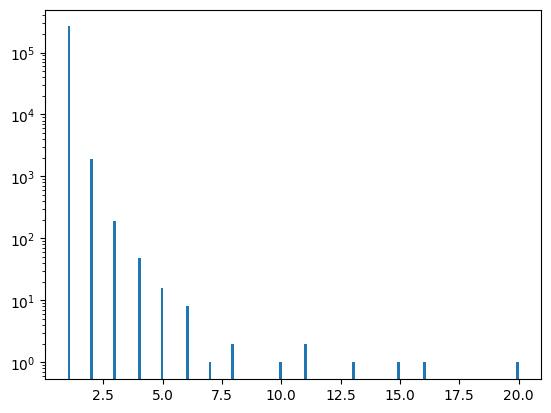

In [ ]:
plt.hist(qid.value_counts().values, bins =160)
plt.yscale('log')
plt.show()

In [ ]:
df = df[['question1','question2','is_duplicate']]
df

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
133832,"How good is the MSc Innovation, Entrepreneursh...",What does Jake Williams think about the Blacks...,0
133833,How can I be a better person and improve my qu...,I cannot improve my questions on Quora. This i...,1
133834,Why does it hurt to love someone?,Why does love hurt so good?,1
133835,Does time exist?,"Broadly, does time exist, and if so, in what r...",0


In [ ]:
new_df = df.sample(30000, random_state=2)

In [ ]:
x = new_df[['question1','question2']]
x

,question1,question2
7041,How do you find your health insurance policy n...,I am 27 and I want to take a health insurance ...
59839,Is Clinton likely to win the election?,How certain are you that Hillary Clinton will ...
11368,How I cut out this pie lattice that looks like...,What was the policy of the secular Arab leader...
61497,What is the valid reason for India only gettin...,Why India fails to get medals in Olympics?
44350,What should I do to boost my self-esteem and s...,How can I boost my self-esteem?
...,...,...
70776,"If you could go back in time, and stop yoursel...","If you could go back in time and do one thing,..."
117437,What are some amazing facts about the Indian e...,Can someone tell the most interesting facts ab...
48403,Which are the smart cities of the India?,Which are the cities of India to have the smar...
34574,How do students at IITs use NPTEL? Does anybod...,Do people at IIT study from NPTEL slides?


In [ ]:
y = new_df['is_duplicate']
type(y)


pandas.core.series.Series

In [ ]:
def remove_punctuation(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [ ]:
new_df['question1'] = new_df['question1'].apply(remove_punctuation)
new_df['question2'] = new_df['question2'].apply(remove_punctuation)




In [ ]:
sw = stopwords.words('english')
def remove_stopwords(text):
   
    words = word_tokenize(text)
    wo_stopwords = [word for word in words if word.lower not in sw]
    
    return " ".join(wo_stopwords)

In [ ]:
# new_df['question1'] = new_df['question1'].apply(remove_stopwords)
# new_df['question2'] = new_df['question2'].apply(remove_stopwords)



In [ ]:
def num_words(text):
  words = word_tokenize(text)
  num = len(words)
  return num
new_df['numberofwords1'] = new_df['question1'].apply(num_words)
new_df['numberofwords2'] = new_df['question2'].apply(num_words)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Create an instance of CountVectorizer
vectorizer = TfidfVectorizer()
questions = list(new_df['question1']) + list(new_df['question2'])

q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)
q1_arr



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=new_df.index) 

In [ ]:
temp_df = pd.concat([temp_df1,temp_df2], axis = 1)

In [ ]:
temp_df

In [ ]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df['num_words'] = new_df['numberofwords1'] + new_df['numberofwords2']


temp_df

In [ ]:
def num_char(text):
  characters = list(text)
  num_char = len(characters)
  return num_char


In [ ]:
new_df['numberofchar1'] = new_df['question1'].apply(num_char)
new_df['numberofchar2'] = new_df['question2'].apply(num_char)

In [ ]:
temp_df['num_char1'] = new_df['numberofchar1']
temp_df['num_char2'] = new_df['numberofchar2']

In [ ]:
def count_common_words(row, col1, col2):
    words1 = set(re.findall(r'\w+', row[col1].lower()))
    words2 = set(re.findall(r'\w+', row[col2].lower()))
    common_words = words1.intersection(words2)
    return len(common_words)



In [ ]:
temp_df['CommonWordsCount'] = new_df.apply(count_common_words, args=('question1', 'question2'), axis=1)


In [ ]:
temp_df['word_share'] = temp_df['CommonWordsCount']/temp_df['num_words']

In [ ]:
temp_df['wordsin1'] = new_df['numberofwords1']
temp_df['wordsin2'] = new_df['numberofwords2']

In [ ]:
temp_df['unique_words'] = temp_df['num_words'] - temp_df['CommonWordsCount']

In [ ]:
temp_df['uniqueness_per_word'] = temp_df['unique_words']/temp_df['num_words']

In [ ]:
temp_df.columns = temp_df.columns.astype(str)


In [ ]:
temp_df

In [ ]:
X = temp_df.drop(columns = ['is_duplicate'], axis=1)
X

In [ ]:
Y = temp_df['is_duplicate']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 43)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)



In [ ]:
y_predict = rf_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)


In [ ]:
accuracy

In [ ]:
temp_df

In [ ]:
temp_df[['num_words','num_char1','num_char2','word_share','CommonWordsCount', 'wordsin1','wordsin2','unique_words','uniqueness_per_word']].describe()

In [ ]:
correlation = temp_df[['num_words',	'num_char1',	'num_char2',	'word_share','unique_words'	,'CommonWordsCount', 'wordsin1','wordsin2','is_duplicate','uniqueness_per_word']].corr()
correlation['is_duplicate']


NameError: ignored